In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install seaborn

     |████████████████████████████████| 292 kB 4.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('datasets/happiness.csv')
df.head(8)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380


In [5]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

# Presentación Final
# Descripción de los datos
### La base de datos muestra a los países con los distintos valores que conforman el puntaje de lo que se le llama "Felicidad". 
### La base de Datos cuenta con 9 variables:
#### Variables Categóricas:
- 'Country or region': Indica el país o región del cual se muestran sus valores de distintas áreas

#### Variables Continuas: 
- 'Overall rank': 
Indica la posición general de los países en orden decreciente en cuanto al puntaje obtenido de la encuesta
- 'Score': 
Valor númerico que indica la ponderacion de todas las demás variables.  
- 'GDP per capita': 
Expresa la suma total del precio en el mercado de todos los bienes y servicios finales producidos por persona en cada país.
- 'Social Support': 
Indica el índice de apoyo social a estos países sobre sus ciudadanos
- 'Healthy life expectancy': 
Número que representa el índice de expectativa de vida
- 'Freedom to make life choices': 
Habla sobre la libertad de los ciudadanos para realizar decisiones de la vida 
- 'Generosity': 
Indica la generosidad de las personas en cada país
- 'Perceptions of corruption': 
Plasma un valor en cuanto a la forma en que la corrupción se muestra en los países por cada ciudadano

base de datos tomada de https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

# Pregunta de Investigación #1
# ¿Cuál es la distribución de la Esperanza de Vida y Generosidad de los países durante el 2019?

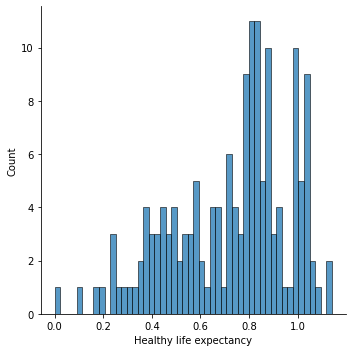

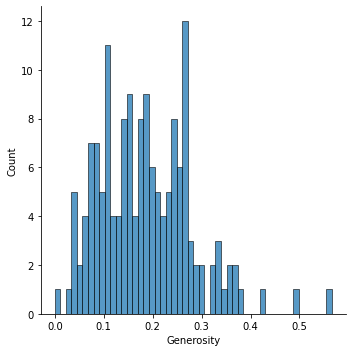

In [9]:
x = sns.displot(df['Healthy life expectancy'],
             #kde = True, #Whether to plot a gaussian kernel density estimate.
             bins = 50, #cuantas barras del histograma. Default = 10
            )
y = sns.displot(df['Generosity'],
             #kde = True, #Whether to plot a gaussian kernel density estimate.
             bins = 50, #cuantas barras del histograma. Default = 10
            )


## Esperanza de Vida:
#### La distribución de los datos presenta un sesgo a la _izquierda_ y la figura a la que más relacion presenta es a la distribución de Weibull.

## Generosidad:
#### Este histograma muestra, diferente a la Esperanza de Vida, un sesgo a la _derecha_ con un parentezco a la distribución de Weibull
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

# Pregunta de Investigación #2
# ¿Existe correlación entre el puntaje de Felicidad [Score] con la [Libertad de Tomar Decisiones]?

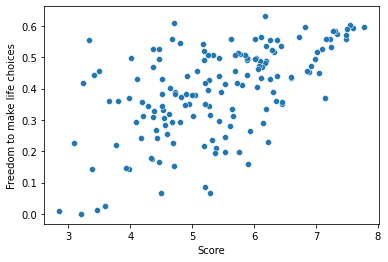

In [10]:
# Se realiza una gráfica de dispersión entre estas dos variables
sns.scatterplot(x = df['Score'],
                y = df['Freedom to make life choices'],
                data = df
               )
#sns.lmplot(x="Score", y="Freedom to make life choices", data = df);

In [11]:
from scipy import stats
stats.pearsonr(df['Score'], df['Freedom to make life choices'])

(0.5667418257199901, 1.2379243627982124e-14)

### Visto el coeficiente de Pearson (0.56) se observa una relación poco fuerte en donde no se le puede atribuir la libertad de decisión directamente a la felicidad de los países.
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.

# Pregunta de Investigación #3

Text(0.5, 1.0, 'Gráfica de Línea de Generosidad')

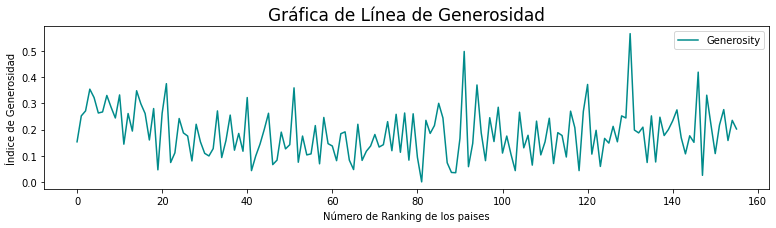

In [20]:
#df['Generosity'].plot(kind = 'line', color="darkcyan", figsize =(13,3))
df[['Generosity','Country or region']].plot(kind = 'line', color="darkcyan", figsize =(13,3))
#df[['Country or region','Generosity']].plot(kind = 'line', color="darkcyan", figsize =(13,3))

plt.xlabel('Número de Ranking de los paises')
plt.ylabel('Índice de Generosidad')

plt.title('Gráfica de Línea de Generosidad', fontsize = 17)

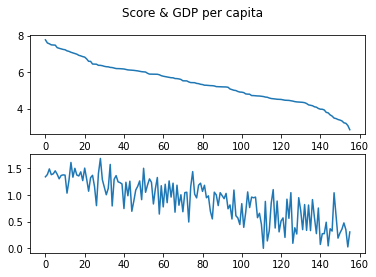

In [13]:
fig, axs = plt.subplots(2)
fig.suptitle('Score & GDP per capita')
axs[0].plot(df['Score'])
axs[1].plot(df['GDP per capita'])

In [14]:
tabla_pivote = pd.pivot_table(df,
                          index = 'Country or region',
                          #values = 'Generosity',
                          aggfunc = 'sum',#['sum','median']
                          #columns = 'Healthy life expectancy',
                          #margins = True #Margin crea una nueva columna que suma todo
                         )
tabla_pivote

,Freedom to make life choices,GDP per capita,Generosity,Healthy life expectancy,Overall rank,Perceptions of corruption,Score,Social support
Country or region,,,,,,,,
Afghanistan,0.000,0.350,0.158,0.361,154,0.025,3.203,0.517
Albania,0.383,0.947,0.178,0.874,107,0.027,4.719,0.848
Algeria,0.086,1.002,0.073,0.785,88,0.114,5.211,1.160
Argentina,0.471,1.092,0.066,0.881,47,0.050,6.086,1.432
Armenia,0.283,0.850,0.095,0.815,116,0.064,4.559,1.055
...,...,...,...,...,...,...,...,...
Venezuela,0.154,0.960,0.064,0.805,108,0.047,4.707,1.427
Vietnam,0.543,0.741,0.147,0.851,94,0.073,5.175,1.346
Yemen,0.143,0.287,0.108,0.463,151,0.077,3.380,1.163


In [15]:
top = df.sort_values(['Score'],
              ascending = False
             ).head(6)
top

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


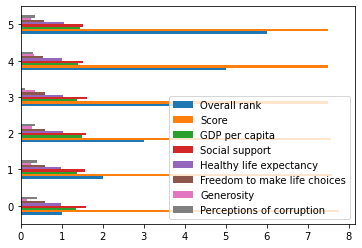

In [17]:
top.plot(kind = 'barh')

In [ ]:
hist = df.